# Distance metrics for MCDA methods
This manual explains the usage of the library package `distance_metrics_mcda` that provides metrics that can measure alternatives distance from reference solutions in multi-criteria decision analysis. This library contains module weighting_methods with the following distance metrics:
- Euclidean distance `euclidean`
- Manhattan (Taxicab) distance `manhattan`
- Hausdorff distance `hausdorff`
- Correlation distance `correlation`
- Chebyshev distance `chebyshev`
- Standardized euclidean distance `std_euclidean`
- Cosine distance `cosine`
- Cosine similarity measure `csm`
- Squared Euclidean distance `squared_euclidean`
- Sorensen or Bray-Curtis distance `bray_curtis`
- Canberra distance `canberra`
- Lorentzian distance `lorentzian`
- Jaccard distance `jaccard`
- Dice distance `dice`
- Bhattacharyya distance `bhattacharyya`
- Hellinger distance `hellinger`
- Matusita distance `matusita`
- Squared-chord distance `squared_chord`
- Pearson chi-square distance `pearson_chi_square`
- Squared chi-square distance `squared_chi_square`

The library also provides other methods necessary for multi-criteria decision analysis, which are as follows: The TOPSIS method for multi-criteria decision analysis TOPSIS in module `mcda_methods`. The TOPSIS method is based on measuring the distance of alternatives from Positive Ideal Solution and Negative Ideal Solution using `distance_metrics` mentioned above.

Normalization techniques:

- Linear `linear_normalization`
- Minimum-Maximum `minmax_normalization`
- Maximum `max_normalization`
- Sum `sum_normalization`
- Vector `vector_normalization`

Correlation coefficients:

- Spearman rank correlation coefficient rs `spearman`
- Weighted Spearman rank correlation coefficient rw `weighted_spearman`
- Pearson coefficent `pearson_coeff`

Objective weighting methods:

- Entropy weighting method `entropy_weighting`
- CRITIC weighting method `critic_weighting`


Import the necessary modules and methods from package `objective_weights_mcda`.

In [1]:
from distance_metrics_mcda.mcda_methods import TOPSIS
from distance_metrics_mcda.additions import rank_preferences
from distance_metrics_mcda import correlations as corrs
from distance_metrics_mcda import normalizations as norms
from distance_metrics_mcda import distance_metrics as dists
from distance_metrics_mcda import weighting_methods as mcda_weights

Import other necessary Python modules.

In [2]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns

Functions for results visualization.

In [3]:
# Functions for visualization
def plot_barplot(df_plot, x_name, y_name, title):
    """
    Display column stacked column chart of weights for criteria for `x_name == Weighting methods`
    and column chart of ranks for alternatives `x_name == Alternatives`

    Parameters
    ----------
        df_plot : dataframe
            dataframe with criteria weights calculated different weighting methods
            or with alternaives rankings for different weighting methods
        x_name : str
            name of x axis, Alternatives or Weighting methods
        y_name : str
            name of y axis, Ranks or Weight values
        title : str
            name of chart title, Weighting methods or Criteria
    """
    list_rank = np.arange(1, len(df_plot) + 1, 1)
    stacked = True
    width = 0.5
    if x_name == 'Alternatives':
        stacked = False
        width = 0.8
    else:
        df_plot = df_plot.T
    ax = df_plot.plot(kind='bar', width = width, stacked=stacked, edgecolor = 'black', figsize = (9,4))
    ax.set_xlabel(x_name, fontsize = 12)
    ax.set_ylabel(y_name, fontsize = 12)

    if x_name == 'Alternatives':
        ax.set_yticks(list_rank)

    ax.set_xticklabels(df_plot.index, rotation = 'horizontal')
    ax.tick_params(axis = 'both', labelsize = 12)

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
    ncol=5, mode="expand", borderaxespad=0., edgecolor = 'black', title = title, fontsize = 11)

    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()


def draw_heatmap(data, title):
    """
    Display heatmap with correlations of compared rankings generated using different methods

    Parameters
    ----------
    data : dataframe
        dataframe with correlation values between compared rankings
    title : str
        title of chart containing name of used correlation coefficient
    """
    plt.figure(figsize = (6, 4))
    sns.set(font_scale=0.8)
    heatmap = sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGn",
                          linewidth=0.5, linecolor='w')
    plt.yticks(va="center")
    plt.xlabel('Weighting methods')
    plt.title('Correlation coefficient: ' + title)
    plt.tight_layout()
    plt.show()


def plot_boxplot(data):
    """
    Display boxplot showing distribution of criteria weights determined with different methods.

    Parameters
    ----------
    data : dataframe
        dataframe with correlation values between compared rankings
    """
    
    plt.figure(figsize = (7, 4))
    
    ax = data.boxplot()
    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    ax.set_xlabel('Alternatives', fontsize = 12)
    ax.set_ylabel('TOPSIS preference distribution', fontsize = 12)
    plt.tight_layout()
    plt.show()

# Create dictionary class
class Create_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

The dataset of mobile phones was acquired from the paper: Guo, M., Liao, X., Liu, J., & Zhang, Q. (2020). Consumer preference analysis: A data-driven multiple criteria approach integrating online information. Omega, 96, 102074. This dataset contains data of 25 models of mobile phones considering 11 evaluation criteria. For the purposes of this research, we selected the first 15 alternatives from this set. The second to last row of CSV includes criteria types and the last row includes expert criteria weights. However in this research example authors calculated weights using objective CRITIC weighting method.

In [4]:
criteria_presentation = pd.read_csv('smartphones_criteria.csv', index_col = 'G')
criteria_presentation

,Criteria group,Cj,Explanation,Type
G,,,,
G1,Hardware and performance,C1,Front camera resolution(megapixels),1
,,C2,Rear camera resolution(megapixels),1
,,C3,Battery capacity(mAh),1
,,C4,RAM(GB),1
,,C5,Screen size(inch),1
,,C6,CPU rating,1
G2,Appearance,C7,Appearance rating,1
G3,Brand,C8,Market share(%),1
,,C9,Brand favorable rate(%),1


In [5]:
data_presentation = pd.read_csv('dataset_smartphones.csv', index_col = 'Ai')
data_presentation = data_presentation.iloc[:len(data_presentation) - 12, :]
data_presentation

,Name,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
Ai,,,,,,,,,,,,
A1,Huawei Honor V10,13.0,2.0,3750.0,6.0,6.0,6701.0,3.2,9.8,0.72,2.9,2999.0
A2,Samsung Galaxy Note8,8.0,12.0,3300.0,6.0,6.3,6806.0,4.3,12.7,0.82,3.7,6988.0
A3,iPhone8 Plus,7.0,12.0,2675.0,3.0,5.5,10304.0,3.4,7.8,0.86,3.0,6688.0
A4,Xiaomi Note3,8.0,12.0,3350.0,4.0,5.2,6805.0,3.6,7.3,0.65,3.0,2099.0
A5,iPhone X,7.0,12.0,2700.0,3.0,5.8,10304.0,4.1,7.8,0.86,3.2,8388.0
A6,Xiaomi Mix2,5.0,12.0,3400.0,6.0,6.0,6806.0,3.4,7.3,0.65,2.9,2999.0
A7,One Plus 5t,16.0,20.0,3300.0,6.0,6.0,6805.0,3.1,2.0,0.89,2.5,2999.0
A8,Oppo R11s,20.0,20.0,3205.0,4.0,6.0,5888.0,4.6,13.3,0.83,4.2,2999.0
A9,Huawei Mate10 Pro-,8.0,20.0,4000.0,6.0,6.0,6701.0,4.1,12.3,0.74,3.5,4899.0


Load a decision matrix containing only the performance values of the alternatives against the criteria and the criteria type in the second to last row, as shown below. Transform the decision matrix and criteria type from dataframe to NumPy array.

In [6]:
# Load data from CSV
filename = 'dataset_mobile_phones.csv'
data = pd.read_csv(filename, index_col = 'Ai')
# Load decision matrix from CSV
df_data = data.iloc[:len(data) - 12, :]
# Criteria types are in the last row of CSV
types = data.iloc[len(data) - 2, :].to_numpy()

# Convert decision matrix from dataframe to numpy ndarray type for faster calculations.
matrix = df_data.to_numpy()

# Symbols for alternatives Ai
list_alt_names = [r'$A_{' + str(i) + '}$' for i in range(1, df_data.shape[0] + 1)]
# Symbols for columns Cj
cols = [r'$C_{' + str(j) + '}$' for j in range(1, data.shape[1] + 1)]
print('Decision matrix')
df_data

Decision matrix


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
Ai,,,,,,,,,,,
A1,13.0,2.0,3750.0,6.0,6.0,6701.0,3.2,9.8,0.72,2.9,2999.0
A2,8.0,12.0,3300.0,6.0,6.3,6806.0,4.3,12.7,0.82,3.7,6988.0
A3,7.0,12.0,2675.0,3.0,5.5,10304.0,3.4,7.8,0.86,3.0,6688.0
A4,8.0,12.0,3350.0,4.0,5.2,6805.0,3.6,7.3,0.65,3.0,2099.0
A5,7.0,12.0,2700.0,3.0,5.8,10304.0,4.1,7.8,0.86,3.2,8388.0
A6,5.0,12.0,3400.0,6.0,6.0,6806.0,3.4,7.3,0.65,2.9,2999.0
A7,16.0,20.0,3300.0,6.0,6.0,6805.0,3.1,2.0,0.89,2.5,2999.0
A8,20.0,20.0,3205.0,4.0,6.0,5888.0,4.6,13.3,0.83,4.2,2999.0
A9,8.0,20.0,4000.0,6.0,6.0,6701.0,4.1,12.3,0.74,3.5,4899.0


In [7]:
print('Criteria types')
types

Criteria types


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.])

Calculate the weights with the selected weighing method. In this case, the Entropy weighting method (entropy_weighting) is selected.

In [8]:
weights = mcda_weights.critic_weighting(matrix, types)
df_weights = pd.DataFrame(weights.reshape(1, -1), index = ['Weights'], columns = cols)
df_weights

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$,$C_{6}$,$C_{7}$,$C_{8}$,$C_{9}$,$C_{10}$,$C_{11}$
Weights,0.090631,0.078639,0.100805,0.148487,0.074187,0.089689,0.074635,0.083033,0.106157,0.066252,0.087486


Use the TOPSIS method to determine the value of the preference function (pref) and the ranking of alternatives (rank). The TOPSIS method ranks alternatives descendingly according to preference function values, so the reverse parameter in the `rank_preferences` method is set to True.

In [9]:
# Create the TOPSIS method object
topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = dists.euclidean)

# Calculate alternatives preference function values with TOPSIS method
pref = topsis(matrix, weights, types)

# rank alternatives according to preference values
rank = rank_preferences(pref, reverse = True)

# save results in dataframe
df_results = pd.DataFrame(index = list_alt_names)
df_results['Pref'] = pref
df_results['Rank'] = rank
df_results

,Pref,Rank
$A_{1}$,0.557878,5
$A_{2}$,0.613773,2
$A_{3}$,0.382911,12
$A_{4}$,0.376623,13
$A_{5}$,0.406067,11
$A_{6}$,0.506174,9
$A_{7}$,0.605020,4
$A_{8}$,0.605045,3
$A_{9}$,0.639116,1
$A_{10}$,0.371339,14


The second part of the manual contains codes for benchmarking against several different criteria weighting methods. List the weighting methods you wish to explore.

In [10]:
# part 2 - study with several distance metrics
# Create a list with distance metrics that you want to explore
distance_metrics = [
    dists.euclidean,
    dists.manhattan,
    # dists.hausdorff,
    # dists.correlation,
    # dists.chebyshev,
    # dists.cosine,
    # dists.squared_euclidean,
    dists.bray_curtis,
    dists.canberra,
    dists.lorentzian,
    # dists.jaccard,
    # dists.dice,
    dists.hellinger,
    dists.matusita,
    dists.squared_chord,
    dists.pearson_chi_square,
    dists.squared_chi_square
]

Below is a loop with code to collect results for each distance metric. Then display the results, namely preference function values and rankings.

In [11]:
# Create dataframes for preference function values and rankings determined using distance metrics
df_preferences = pd.DataFrame(index = list_alt_names)
df_rankings = pd.DataFrame(index = list_alt_names)

for distance_metric in distance_metrics:
    # Create the TOPSIS method object
    topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = distance_metric)
    pref = topsis(matrix, weights, types)
    rank = rank_preferences(pref, reverse = True)
    df_preferences[distance_metric.__name__.capitalize().replace('_', ' ')] = pref
    df_rankings[distance_metric.__name__.capitalize().replace('_', ' ')] = rank

In [12]:
df_preferences

,Euclidean,Manhattan,Bray curtis,Canberra,Lorentzian,Hellinger,Matusita,Squared chord,Pearson chi square,Squared chi square
$A_{1}$,0.557878,0.528809,0.764405,0.690239,0.526128,0.635184,0.635184,0.737152,0.117176,0.663579
$A_{2}$,0.613773,0.626334,0.813167,0.784440,0.623530,0.675393,0.675393,0.876411,0.184789,0.795719
$A_{3}$,0.382911,0.347487,0.673744,0.602494,0.349972,0.582057,0.582057,0.478531,0.038309,0.420936
$A_{4}$,0.376623,0.352678,0.676339,0.609918,0.355209,0.592364,0.592364,0.540537,0.033966,0.467656
$A_{5}$,0.406067,0.390897,0.695448,0.624102,0.393471,0.587017,0.587017,0.506540,0.047524,0.462203
$A_{6}$,0.506174,0.466063,0.733031,0.641391,0.464597,0.611055,0.611055,0.627756,0.086047,0.575777
$A_{7}$,0.605020,0.608266,0.804133,0.684588,0.604907,0.643671,0.643671,0.733333,0.157494,0.695822
$A_{8}$,0.605045,0.685968,0.842984,0.840399,0.685448,0.695958,0.695958,0.910199,0.211622,0.844161
$A_{9}$,0.639116,0.661767,0.830884,0.802897,0.658651,0.687982,0.687982,0.900479,0.221185,0.829805
$A_{10}$,0.371339,0.360001,0.680001,0.667939,0.362713,0.607423,0.607423,0.648179,0.032175,0.511833


In [13]:
df_rankings

,Euclidean,Manhattan,Bray curtis,Canberra,Lorentzian,Hellinger,Matusita,Squared chord,Pearson chi square,Squared chi square
$A_{1}$,5,6,6,5,6,6,6,5,5,6
$A_{2}$,2,3,3,3,3,3,3,3,3,3
$A_{3}$,12,14,14,13,14,14,14,14,12,14
$A_{4}$,13,13,13,12,13,11,11,11,13,11
$A_{5}$,11,10,10,11,10,12,12,12,11,12
$A_{6}$,9,9,9,10,9,9,9,10,9,9
$A_{7}$,4,4,4,7,4,5,5,6,4,5
$A_{8}$,3,1,1,1,1,1,1,1,2,1
$A_{9}$,1,2,2,2,2,2,2,2,1,2
$A_{10}$,14,12,12,9,12,10,10,9,14,10


Visualize the results as column graphs of the TOPSIS preference function values, alternatives rankings and correlations.

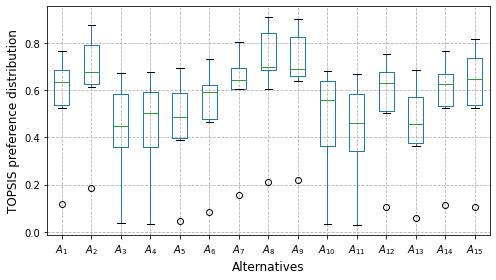

In [14]:
# plot box chart of alternatives preference values
plot_boxplot(df_preferences.T)

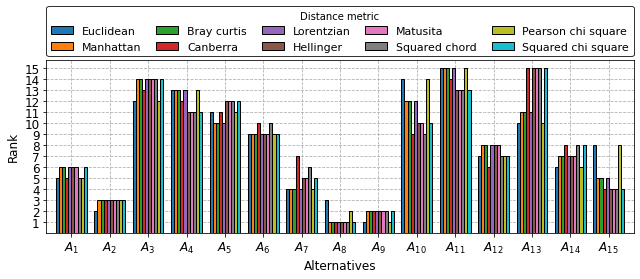

In [15]:
# plot column chart of alternatives rankings
plot_barplot(df_rankings, 'Alternatives', 'Rank', 'Distance metric')

In [16]:
# Plot heatmaps of rankings correlation coefficient
# Create dataframe with rankings correlation values
results = copy.deepcopy(df_rankings)
method_types = list(results.columns)
dict_new_heatmap_p = Create_dictionary()

for el in method_types:
    dict_new_heatmap_p.add(el, [])

for i, j in [(i, j) for i in method_types[::-1] for j in method_types]:
    dict_new_heatmap_p[j].append(corrs.pearson_coeff(results[i], results[j]))

df_new_heatmap_p = pd.DataFrame(dict_new_heatmap_p, index = method_types[::-1])
df_new_heatmap_p.columns = method_types

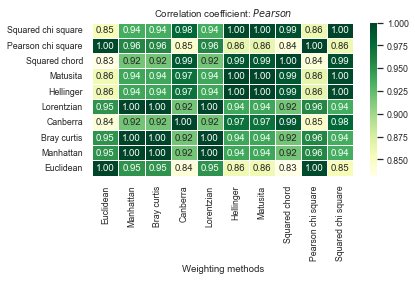

In [17]:
# Plot heatmap with rankings correlation
draw_heatmap(df_new_heatmap_p, r'$Pearson$')